# MakeOverMonday
## 2020/W25
### https://data.world/makeovermonday/2020w25-amazons-tiny-profits-explained

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/boarssbicaohnlgdpcsc23ljpp6k4m')

In [3]:
df.head()

,Quarter,Revenue (US $M),Net Income (US $M)
0,2020-03-31,"$75,452","$2,535"
1,2019-12-31,"$87,437","$3,268"
2,2019-09-30,"$69,981","$2,134"
3,2019-06-30,"$63,404","$2,625"
4,2019-03-31,"$59,700","$3,561"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Quarter             61 non-null     datetime64[ns]
 1   Revenue (US $M)     61 non-null     object        
 2   Net Income (US $M)  61 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


In [5]:
df.shape

(61, 3)

In [6]:
df['revenue'] = df['Revenue (US $M)'].apply(lambda x: float(x.replace('$','').replace(',','')))
df['net_income'] = df['Net Income (US $M)'].apply(lambda x: float(x.replace('$','').replace(',','')))

In [9]:
df.loc[~(df['net_income'] < 0), 'color'] = 'gray'
df.loc[df['net_income'] < 0, 'color'] = 'orange'

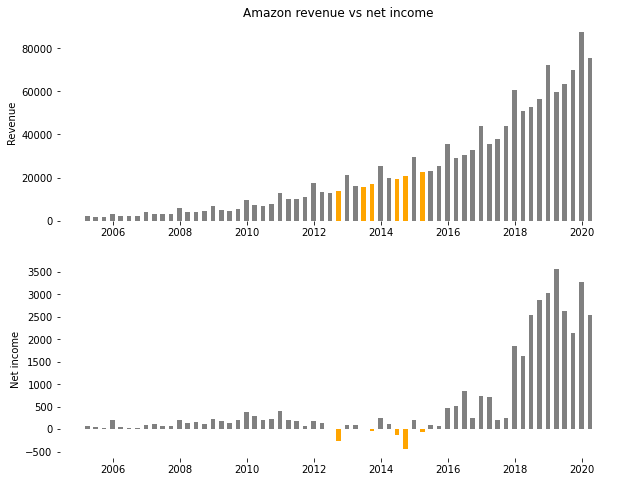

In [24]:
fig, axes = plt.subplots(2,1,figsize=(10,8))
axes[0].set_title('Amazon revenue vs net income')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].bar(df['Quarter'], df['revenue'], width=50, color=df['color'])
axes[0].set_ylabel('Revenue')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].bar(df['Quarter'], df['net_income'], width=50, color=df['color'])
axes[1].set_ylabel('Net income')
fig.savefig('sample.png', bbox_inches="tight")